Tutorial 9 Artificial Neural Network

MECH 305/306 April 7th

Dataset

https://www.kaggle.com/uciml/pima-indians-diabetes-database

* This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
* The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 
* The datasets consists of several medical predictor variables and one outcome variable. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, etc. The outcome variable is either 1: have diabetes or 0: does not have diabetes.
* Our goal: build an artificial neural network model to predict whether the patients have diabetes or not.

In [ ]:
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

# Step 1: Load the Data for Training

Input Variables for Training:
* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function
* Age (years)

Labels (outcomes) for Training:
* Class variable (0 or 1)
* 0: no diabetes; 1: diabetes

In [ ]:
# Load the raw csv data directly from Kaggle database
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
data.info()
data.head()

In [ ]:
# Split the training and testing data
inputs = data.values[:,0:8]
labels = data.values[:,8].reshape((-1, 1))
sampleSize = inputs.shape[0]
# testInputs = inputs[0:int(sampleSize/3), :] # 1/3 for testing
# testLabels = labels[0:int(sampleSize/3), :]
# trainInputs = inputs[-int(sampleSize*2/3):, :] # 2/3 for training
# trainLabels = labels[-int(sampleSize*2/3):, :]

# Step 2. Configure the Neural Network

In [ ]:
# Set up the network architecture
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

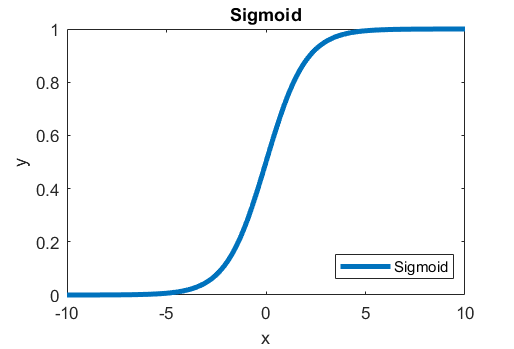

Formula: $f(x) =  \frac{1}{1 + e^{-x}}$  
Typically used for binary classification.

In [ ]:
# Compile the network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Cross Entropy Loss

$D(\vec{predicted}, \vec{label}) = -\sum_i \vec{label}(i)log(\vec{predicted}(i))$

In [ ]:
# Visualize the neural network's architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

import matplotlib.image as img
im = img.imread('model_plot.png')
plt.imshow(im)

# Step 3. Train the Neural Network

In [ ]:
history = model.fit(inputs, labels, validation_split=0.33,epochs=150, batch_size=10, verbose=0)

Key parameter explanation
* Sample: a single row of data.
* Epoch: the number of times that the network will work through the entire training dataset.
* Batch size: the number of samples to work through before updating the network's parameters.
* Iteration: the number of batches needed to complete one epoch.
* For example, we split a dataset of 5000 samples into batches of 500. Thus, it will take 10 iterations to complete 1 epoch.
* Validation_split: the ratio of the data used for validation (here in the example, 1/3 used for validation and 2/3 used for training).
* Verbose: display the training progress; 1: display vs. 0: not display.

# Step 4: Evaluate the Neural Network

We can use the learning curve to evaluate the performance of the neural network. Learning curve indicates a good fit if:
* The plot of training loss decreases to stability.
* The plot of validation loss decreases to stability and has a small gap with the training loss.

In [ ]:
# Plot the learning curve (quantified by loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

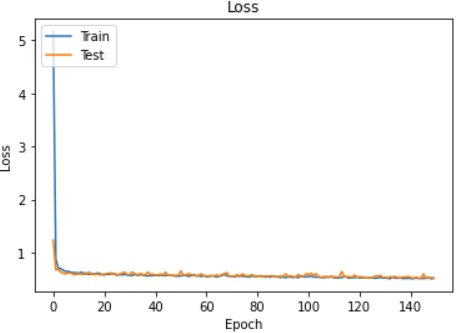

# Overfitting and Underfitting
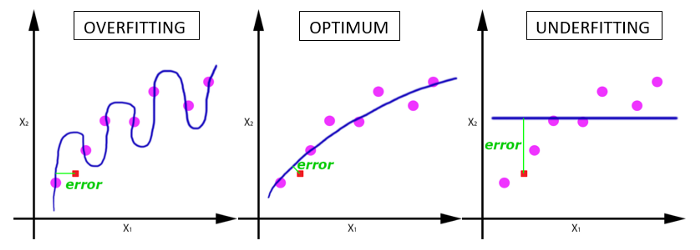

Fig. source: AI Wiki, Overfitting vs Underfitting

Underfitting Characteristics: perform poorly on the training data; generalize poorly to other new test data. 

Learning curve indicates underfitting if:
* The training loss remains flat regardless of training.
* The training loss continues to decrease until the end of training.

In [ ]:
model = Sequential()
model.add(Dense(24, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(inputs, labels, validation_split=0.33,epochs=10, batch_size=10, verbose=0)

# Plot the training loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

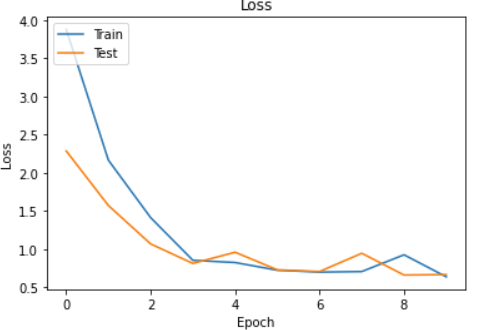

Overfitting characteristics: perform well on the training data, but generliaze poorly to other new test data. 

Learning curve indicates overfitting if:
* The plot of training loss continues to decrease with experience.
* The plot of validation loss decreases to a point and begins increasing again.

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(inputs, labels, validation_split=0.33,epochs=5000, batch_size=15, verbose=0) 

# Plot the training loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

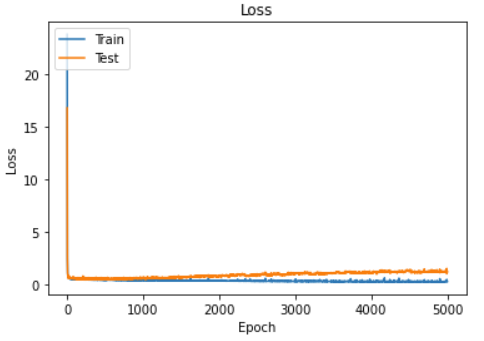

# K-Fold Cross Validation
This method evaluates the performance of a neural network with less variance than a single train-test set split. Base on the k different performances, you can summarize the performance using a mean and a standard deviation of the k accuracies, which is a more comprehensive and reliable estimation of the network's performance.
* The original sample is randomly partitioned into k equal sized subsamples. 
* A single subsample is retained as the validation data for testing the network.
* The remaining k − 1 subsamples are used as training data. 

Visualization of this validation procedure:

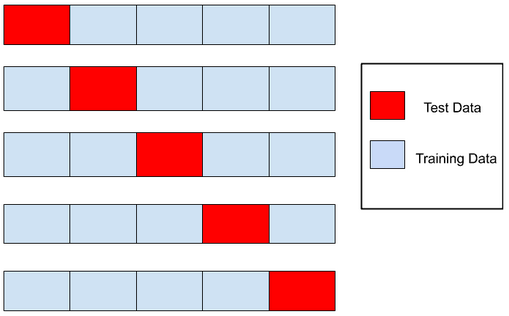

Fig. source: Wikipedia, Cross-validation (statistics)

In [ ]:
K, bestAccuracy = 3, 0 

accuracies = np.zeros((K, 1))
for i in range(K):
    # Split the data for training and testing
    if i == 0:
        kthTestData = inputs[0:int(sampleSize/K), :]
        kthTestLabels = labels[0:int(sampleSize/K), :]
        kthTrainData = inputs[-int(sampleSize*(K-1)/K):, :]
        kthTrainLabels = labels[-int(sampleSize*(K-1)/K):, :]
    elif i == K-2:
        kthTestData = inputs[-int(sampleSize/K):, :]
        kthTestLabels = labels[-int(sampleSize/K):, :]
        kthTrainData = inputs[0:int(sampleSize*(K-1)/K), :];
        kthTrainLabels = labels[0:int(sampleSize*(K-1)/K), :]
    else:
        kthTestData = inputs[i*int(sampleSize/K):(i+1)*int(sampleSize/K),:]
        kthTestLabels = labels[i*int(sampleSize/K):(i+1)*int(sampleSize/K), :]  
        kthTrainDataFront = inputs[0:i*int(sampleSize/K),:]
        kthTrainDataBack = inputs[(i+1)*int(sampleSize/K):, :] 
        kthTrainLabelsFront = labels[0:i*int(sampleSize/K),:]
        kthTrainLabelsBack = labels[(i+1)*int(sampleSize/K):, :] 
        kthTrainData = np.vstack((kthTrainDataFront, kthTrainDataBack))   # Stack arrays in sequence vertically (row wise)
        kthTrainLabels = np.vstack((kthTrainLabelsFront, kthTrainLabelsBack))
    # Configure and compile the kth network for training
    kthModel = Sequential()
    kthModel.add(Dense(12, input_dim=8, activation='relu'))
    kthModel.add(Dense(8, activation='relu'))
    kthModel.add(Dense(1, activation='sigmoid'))
    kthModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Train the kth network
    kthModel.fit(kthTrainData, kthTrainLabels, epochs=150, batch_size=10, verbose=0) 
    # Obtain the prediction accuracy for the kth network
    predictions = kthModel.predict_classes(kthTestData)
    accuracy = np.sum(predictions == kthTestLabels) / kthTestLabels.shape[0]
    accuracies[i] = accuracy
    # Or we can directly use the 'evaluate' method
    _, accuracy = kthModel.evaluate(kthTestData, kthTestLabels)
    if accuracy > bestAccuracy:
        bestAccuracy = accuracy
        bestNN = kthModel
# Show the mean and std of the k accuracies
print('The averaged accuracy =', np.mean(accuracies), '; standard deviation = ', np.std(accuracies))

# Reference/Acknowledgement
* https://machinelearningmastery.com/
* Recommend this website for further self-learning.